### Importing the Data

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("D:/Data Analysis Dimploma/Data Sets/social_media_posts( Data Cleaning ).csv")

In [16]:
df.head()

,Index,Post_Date,Year,Month,City,Post_Type,Post_Details,Likes,Shares,Comments,Post_Link,Page
0,1,45746.0,2025,3,Beirut,Local News,Water supply disruption in Beirut.,1844.0,74,1553.0,https://example.com/post/1,ArabsNews
1,2,45569.0,2024,10,Beirut,Educational,Workshop on AI held in Beirut.,6661.0,2130,1329.0,https://example.com/post/2,ArabsNews
2,3,45648.0,2024,12,Alexandria,Political,Election updates from Alexandria.,3128.0,280,4885.0,https://example.com/post/3,ArabsNews
3,4,45428.0,2024,5,Dubai,Weather Alert,Storm warning issued in Dubai.,2758.0,750,3067.0,https://example.com/post/4,ArabsNews
4,5,45481.0,2024,7,Riyadh,Educational,Workshop on AI held in Riyadh.,1820.0,1387,2068.0,https://example.com/post/5,ArabsNews


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         1012 non-null   int64  
 1   Post_Date     1011 non-null   float64
 2   Year          1012 non-null   int64  
 3   Month         1012 non-null   int64  
 4   City          1012 non-null   object 
 5   Post_Type     1012 non-null   object 
 6   Post_Details  1011 non-null   object 
 7   Likes         1011 non-null   float64
 8   Shares        1012 non-null   int64  
 9   Comments      1010 non-null   float64
 10  Post_Link     1011 non-null   object 
 11  Page          1012 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 95.0+ KB


### Data Cleaning 

In [21]:
df.isnull()

,Index,Post_Date,Year,Month,City,Post_Type,Post_Details,Likes,Shares,Comments,Post_Link,Page
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1007,False,False,False,False,False,False,False,False,False,False,False,False
1008,False,False,False,False,False,False,False,False,False,False,False,False
1009,False,False,False,False,False,False,False,False,False,False,False,False
1010,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
# axis = 1 search by Row
# axis = 0 Search by Columns 

df[df.isnull().any(axis=1)]

,Index,Post_Date,Year,Month,City,Post_Type,Post_Details,Likes,Shares,Comments,Post_Link,Page
137,138,45820.0,2025,6,Riyadh,Political,Election updates from Riyadh.,NaN,2630,4047.0,https://example.com/post/138,ArabsNews
211,212,45343.0,2024,2,Beirut,Religious,Charity campaign launched in Beirut.,313.0,263,NaN,https://example.com/post/212,ArabsNews
322,323,NaN,1900,1,Riyadh,Tech,NaN,7995.0,1486,NaN,NaN,ArabsNews


In [31]:
df.drop(322, inplace = True)

In [33]:
df[df.isnull().any(axis=1)]

,Index,Post_Date,Year,Month,City,Post_Type,Post_Details,Likes,Shares,Comments,Post_Link,Page
137,138,45820.0,2025,6,Riyadh,Political,Election updates from Riyadh.,NaN,2630,4047.0,https://example.com/post/138,ArabsNews
211,212,45343.0,2024,2,Beirut,Religious,Charity campaign launched in Beirut.,313.0,263,NaN,https://example.com/post/212,ArabsNews


<Axes: >

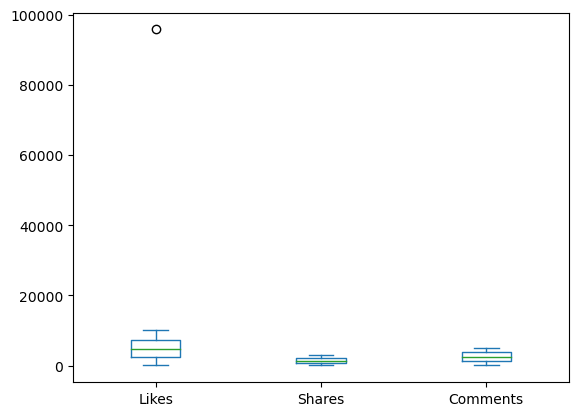

In [43]:
df[['Likes', 'Shares', 'Comments']].plot(kind='box')

In [47]:
df['Likes'].max()

95760.0

In [49]:
df['Likes'].mean()

4947.557425742574

In [57]:
df.sort_values(by='Likes', ascending=False).head(3)

,Index,Post_Date,Year,Month,City,Post_Type,Post_Details,Likes,Shares,Comments,Post_Link,Page
502,503,45778.0,2025,5,Alexandria,Local News,Water supply disruption in Alexandria.,95760.0,2917,995.0,https://example.com/post/503,ArabsNews
495,496,45530.0,2024,8,Baghdad,Educational,Scholarship applications open for Baghdad stud...,9993.0,2724,3856.0,https://example.com/post/496,ArabsNews
333,334,45770.0,2025,4,Jeddah,Weather Alert,Rainfall forecast updated.,9989.0,2407,1196.0,https://example.com/post/334,ArabsNews


In [61]:
df['Likes'] = df['Likes'].replace(95760.0, 9576)

In [63]:
df['Likes'].max()

9993.0

<Axes: >

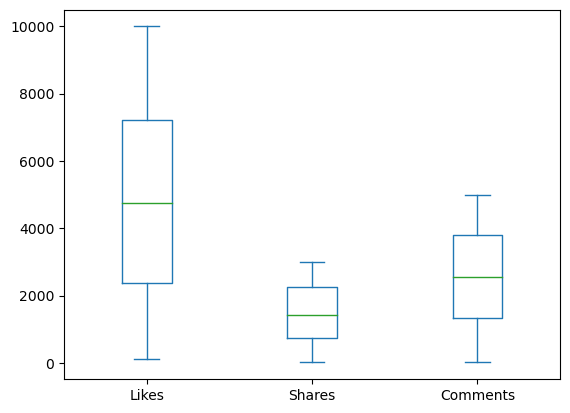

In [65]:
df[['Likes', 'Shares', 'Comments']].plot(kind='box')

In [71]:
df['Comments'].fillna(df['Comments'].mean(), inplace = True)

In [73]:
df[df.isnull().any(axis=1)]

,Index,Post_Date,Year,Month,City,Post_Type,Post_Details,Likes,Shares,Comments,Post_Link,Page
137,138,45820.0,2025,6,Riyadh,Political,Election updates from Riyadh.,NaN,2630,4047.0,https://example.com/post/138,ArabsNews


In [81]:
# & And
# | Or

df_filter = df[ (df['City'] == 'Riyadh') & (df['Post_Type'] == 'Political') ]
df_filter['Likes'].mean()

4166.222222222223

In [85]:
df['Likes'].fillna( df_filter['Likes'].mean(), inplace=True )

In [87]:
df[df.isnull().any(axis=1)]

,Index,Post_Date,Year,Month,City,Post_Type,Post_Details,Likes,Shares,Comments,Post_Link,Page


In [89]:
df['Likes'].median()

4745.0

### Analysing the Data

In [104]:
df[['Likes', 'Shares', 'Comments']].describe().astype(int)

,Likes,Shares,Comments
count,1011,1011,1011
mean,4861,1484,2552
std,2821,879,1424
min,105,12,20
25%,2382,730,1340
50%,4745,1421,2547
75%,7204,2263,3785
max,9993,3000,4999


What is the Most Post Got Reach ? 

In [109]:
num_data = df[['Likes', 'Shares', 'Comments']]

In [115]:
df['Reach'] = num_data.sum(axis=1).astype(int)

In [117]:
df.head()

,Index,Post_Date,Year,Month,City,Post_Type,Post_Details,Likes,Shares,Comments,Post_Link,Page,Reach
0,1,45746.0,2025,3,Beirut,Local News,Water supply disruption in Beirut.,1844.0,74,1553.0,https://example.com/post/1,ArabsNews,3471
1,2,45569.0,2024,10,Beirut,Educational,Workshop on AI held in Beirut.,6661.0,2130,1329.0,https://example.com/post/2,ArabsNews,10120
2,3,45648.0,2024,12,Alexandria,Political,Election updates from Alexandria.,3128.0,280,4885.0,https://example.com/post/3,ArabsNews,8293
3,4,45428.0,2024,5,Dubai,Weather Alert,Storm warning issued in Dubai.,2758.0,750,3067.0,https://example.com/post/4,ArabsNews,6575
4,5,45481.0,2024,7,Riyadh,Educational,Workshop on AI held in Riyadh.,1820.0,1387,2068.0,https://example.com/post/5,ArabsNews,5275


In [127]:
df.groupby('Post_Type')['Reach'].mean().astype(int).to_frame().sort_values(by='Reach', ascending=False)

,Reach
Post_Type,
Educational,9223
Religious,9132
Local News,9069
Political,9057
Entertainment,8962
Weather Alert,8774
Tech,8760
Health,8727
Football,8385


In [131]:
df.groupby('Year')['Reach'].mean().astype(int)

Year
2024    8843
2025    9015
Name: Reach, dtype: int32